# Week 3 MNIST dataset
### 20121702

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
import random
from tqdm import tqdm


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.11.0


1. Write a function that adds random noise to MNIST images. For each pixel in the MNIST image the function should add a random noise contribution drawn from a uniform distribution from 0 to 𝑦𝑛𝑜𝑖𝑠𝑒, where 𝑦𝑛𝑜𝑖𝑠𝑒 is a configurable parameter.

In [2]:
#download dataset
mnist= keras.datasets.mnist
(train_img,train_lbl),(test_img,test_lbl)=mnist.load_data()

#normalize both the training and testing images
train_img=train_img/np.max(train_img)
test_img=test_img/np.max(test_img)

First let's see what our dataset looks like

In [3]:
print(np.shape(train_img)[0],' images to train our model')
print(np.shape(test_img)[0],' images to test our model')

60000  images to train our model
10000  images to test our model


each image has shape of  (28, 28)  pixels


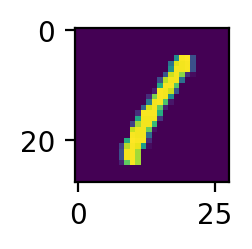

In [4]:
fig,ax=plt.subplots(figsize=(2,1))
ax.imshow(train_img[3])
print('each image has shape of ',np.shape(test_img[0]),' pixels')

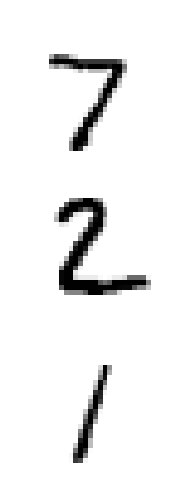

In [5]:
#Function to plot Images (simplification of the function in the lectures):
def PlotImages(img_array):
    fig, axes= plt.subplots(len(img_array),1 ,figsize=(5,len(img_array)))
    for img, ax in zip(img_array, axes):
            ax.imshow(img,cmap='binary')#binary for simplicity
            ax.axis('off')
    plt.show()
sample_test=test_img[:3] #sample from test 
PlotImages(sample_test)



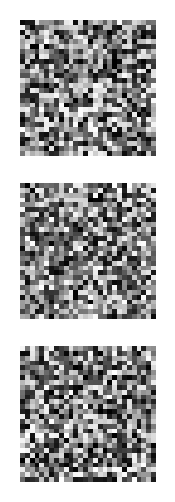

In [6]:
# Function that adds random noise to the images
ynoise=80 #change parameter
def noisy_img(img_arr,y_noise):
    '''
    
    This function will add a random noise from 0 to ynoise (uniform) 
    to all the images from the array img_arr.
    img_arr --> array of pixels of image
    ynoise  --> max value of noise 
    
    '''
    # noise array size of images array
    noise = np.random.uniform(low=0,high=y_noise,size=img_arr.shape)#uniform distribution for the noise
    
    noise_img=img_arr + noise  #add noise
    
    #iterate over all images
    for i in range(len(noise_img)):
        noise_img[i]/=np.max(noise_img[i]) #normalize
        
    return noise_img


#sample
sample_noise=noisy_img(sample_test,ynoise)
PlotImages(sample_noise)


2. Train a neural network on the MNIST dataset such that it gets acceptable performance (e.g a test accuracy of 95% or higher)

In [7]:
#Build the NN

mnist=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
    #Dense layer of 128 neurons, 28x28 input and 'relu' activation
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)])# 10 classes for each possible number
mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         


2023-02-09 11:47:44.528820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
#compile the model and add optimizer(Stochastic Gradient Descent) adn corss entropy loss
mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

In [9]:
#TRAIN MODEL
history = mnist.fit(train_img,train_lbl,batch_size=100,epochs=15,verbose=1)

Epoch 1/15
600/600 [==============================] - 3s 4ms/step - loss: 0.3032 - accuracy: 0.9060
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.1179 - accuracy: 0.9642
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0883 - accuracy: 0.9728
Epoch 4/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0716 - accuracy: 0.9781
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0582 - accuracy: 0.9815
Epoch 6/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0486 - accuracy: 0.9845
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0416 - accuracy: 0.9863
Epoch 8/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0365 - accuracy: 0.9880
Epoch 9/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0332 - accuracy: 0.9890
Epoch 10/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0259 - accuracy: 0.9920

313/313 [==============================] - 1s 2ms/step - loss: 0.0937 - accuracy: 0.9769
The model has achieved an accuracy of  0.9768999814987183


Text(0.5, 1.0, 'accuracy of our model')

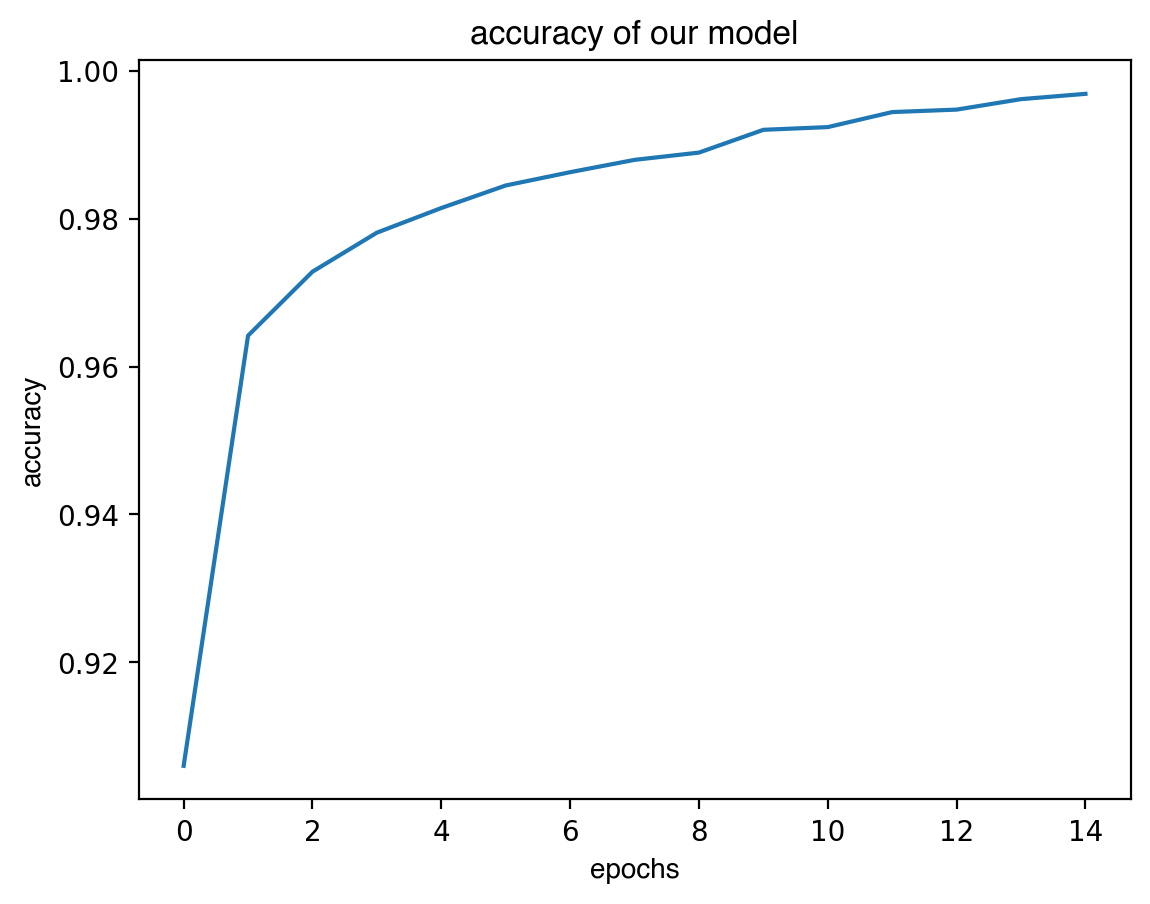

In [10]:
#loss function
test_loss, test_acc = mnist.evaluate(test_img, test_lbl)
print('The model has achieved an accuracy of ', test_acc)
hfont = {'fontname':'Helvetica'}  #change font to Helvetica
#plot
fig,ax=plt.subplots()
ax.plot(history.history['accuracy'])
ax.set_xlabel('epochs', **hfont)
ax.set_ylabel('accuracy', **hfont)
ax.set_title('accuracy of our model', **hfont)

3. Without retraining your network use this network to make a plot of test accuracy vs  𝑦𝑛𝑜𝑖𝑠𝑒   (so run the network repeatedly on the test dataset each time adding a differing noise contribution)


In [11]:
result=[]  #storage
ynoise = np.linspace(0,1,25) 

#iteration over noise values
for i, val in enumerate(tqdm(ynoise)):
    test_loss, test_acc = mnist.evaluate(noisy_img(test_img,val),test_lbl)
    result.append(test_acc)

  0%|                                                    | 0/25 [00:00<?, ?it/s]

313/313 [==============================] - 1s 2ms/step - loss: 0.0937 - accuracy: 0.9769


  4%|█▊                                          | 1/25 [00:01<00:44,  1.85s/it]

313/313 [==============================] - 1s 3ms/step - loss: 0.0966 - accuracy: 0.9752


  8%|███▌                                        | 2/25 [00:03<00:44,  1.92s/it]

313/313 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9706


 12%|█████▎                                      | 3/25 [00:05<00:37,  1.69s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.1374 - accuracy: 0.9621


 16%|███████                                     | 4/25 [00:06<00:30,  1.46s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.1798 - accuracy: 0.9474


 20%|████████▊                                   | 5/25 [00:07<00:26,  1.34s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.9229


 24%|██████████▌                                 | 6/25 [00:08<00:23,  1.25s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8884


 28%|████████████▎                               | 7/25 [00:09<00:21,  1.19s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.8380


 32%|██████████████                              | 8/25 [00:11<00:23,  1.36s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.6555 - accuracy: 0.7849


 36%|███████████████▊                            | 9/25 [00:12<00:20,  1.27s/it]

313/313 [==============================] - 1s 2ms/step - loss: 0.8366 - accuracy: 0.7359


 40%|█████████████████▏                         | 10/25 [00:14<00:20,  1.39s/it]

313/313 [==============================] - 1s 3ms/step - loss: 1.0377 - accuracy: 0.6868


 44%|██████████████████▉                        | 11/25 [00:15<00:19,  1.40s/it]

313/313 [==============================] - 1s 4ms/step - loss: 1.2390 - accuracy: 0.6395


 48%|████████████████████▋                      | 12/25 [00:17<00:19,  1.49s/it]

313/313 [==============================] - 1s 4ms/step - loss: 1.4329 - accuracy: 0.5992


 52%|██████████████████████▎                    | 13/25 [00:18<00:18,  1.58s/it]

313/313 [==============================] - 1s 4ms/step - loss: 1.6268 - accuracy: 0.5624


 56%|████████████████████████                   | 14/25 [00:20<00:18,  1.64s/it]

313/313 [==============================] - 1s 3ms/step - loss: 1.8094 - accuracy: 0.5313


 60%|█████████████████████████▊                 | 15/25 [00:22<00:16,  1.62s/it]

313/313 [==============================] - 1s 3ms/step - loss: 1.9877 - accuracy: 0.4981


 64%|███████████████████████████▌               | 16/25 [00:23<00:14,  1.60s/it]

313/313 [==============================] - 1s 3ms/step - loss: 2.1510 - accuracy: 0.4748


 68%|█████████████████████████████▏             | 17/25 [00:25<00:12,  1.54s/it]

313/313 [==============================] - 1s 3ms/step - loss: 2.3174 - accuracy: 0.4494


 72%|██████████████████████████████▉            | 18/25 [00:26<00:10,  1.50s/it]

313/313 [==============================] - 1s 3ms/step - loss: 2.4546 - accuracy: 0.4293


 76%|████████████████████████████████▋          | 19/25 [00:27<00:08,  1.44s/it]

313/313 [==============================] - 1s 3ms/step - loss: 2.6098 - accuracy: 0.4048


 80%|██████████████████████████████████▍        | 20/25 [00:29<00:07,  1.41s/it]

313/313 [==============================] - 1s 3ms/step - loss: 2.7330 - accuracy: 0.3921


 84%|████████████████████████████████████       | 21/25 [00:30<00:05,  1.36s/it]

313/313 [==============================] - 1s 4ms/step - loss: 2.8451 - accuracy: 0.3705


 88%|█████████████████████████████████████▊     | 22/25 [00:32<00:04,  1.48s/it]

313/313 [==============================] - 1s 3ms/step - loss: 2.9548 - accuracy: 0.3575


 92%|███████████████████████████████████████▌   | 23/25 [00:33<00:02,  1.41s/it]

313/313 [==============================] - 1s 3ms/step - loss: 3.0814 - accuracy: 0.3426


 96%|█████████████████████████████████████████▎ | 24/25 [00:34<00:01,  1.39s/it]

313/313 [==============================] - 1s 3ms/step - loss: 3.1530 - accuracy: 0.3273


100%|███████████████████████████████████████████| 25/25 [00:36<00:00,  1.45s/it]


Text(0.5, 1.0, 'Accuracy descent with increasing noise')

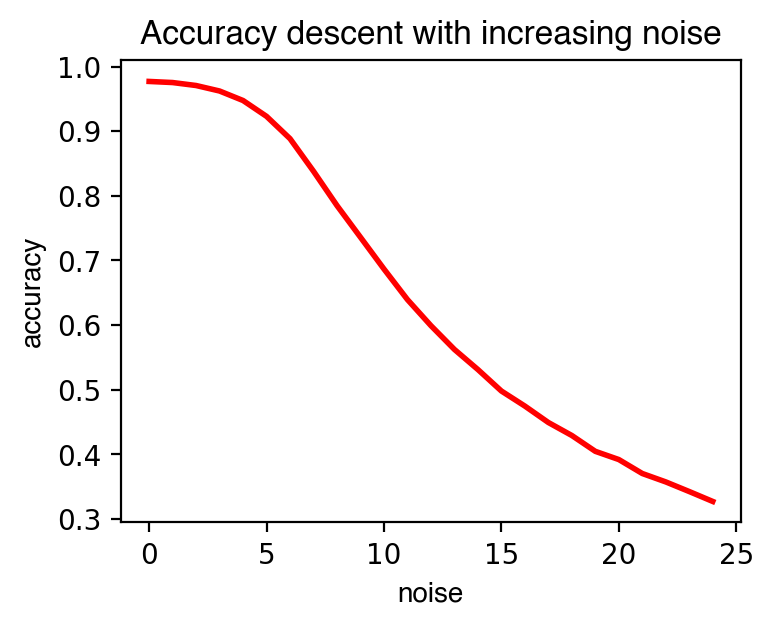

In [12]:
#plot of accuracy
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(result,color='red',linewidth=2)
ax.set_xlabel('noise', **hfont)
ax.set_ylabel('accuracy', **hfont)
ax.set_title('Accuracy descent with increasing noise', **hfont)

4. Now retrain your neural network using the training sample but with some level of noise added to the sample and then redo task 3

In [13]:
#let's RE-TRAIN
ynoise = 0.2 #set noise to .2
history2= mnist.fit(noisy_img(train_img,ynoise),train_lbl, batch_size=100, epochs=15, verbose=1)


Epoch 1/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0279 - accuracy: 0.9907
Epoch 2/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 3/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0170 - accuracy: 0.9946
Epoch 4/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 5/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0095 - accuracy: 0.9974
Epoch 6/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0066 - accuracy: 0.9983
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 8/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.9998
Epoch 9/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 10/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 1.0000

313/313 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9787
The model(noisy) has achieved an accuracy of  0.9786999821662903


Text(0.5, 1.0, 'accuracy of our model with 0.20 noise')

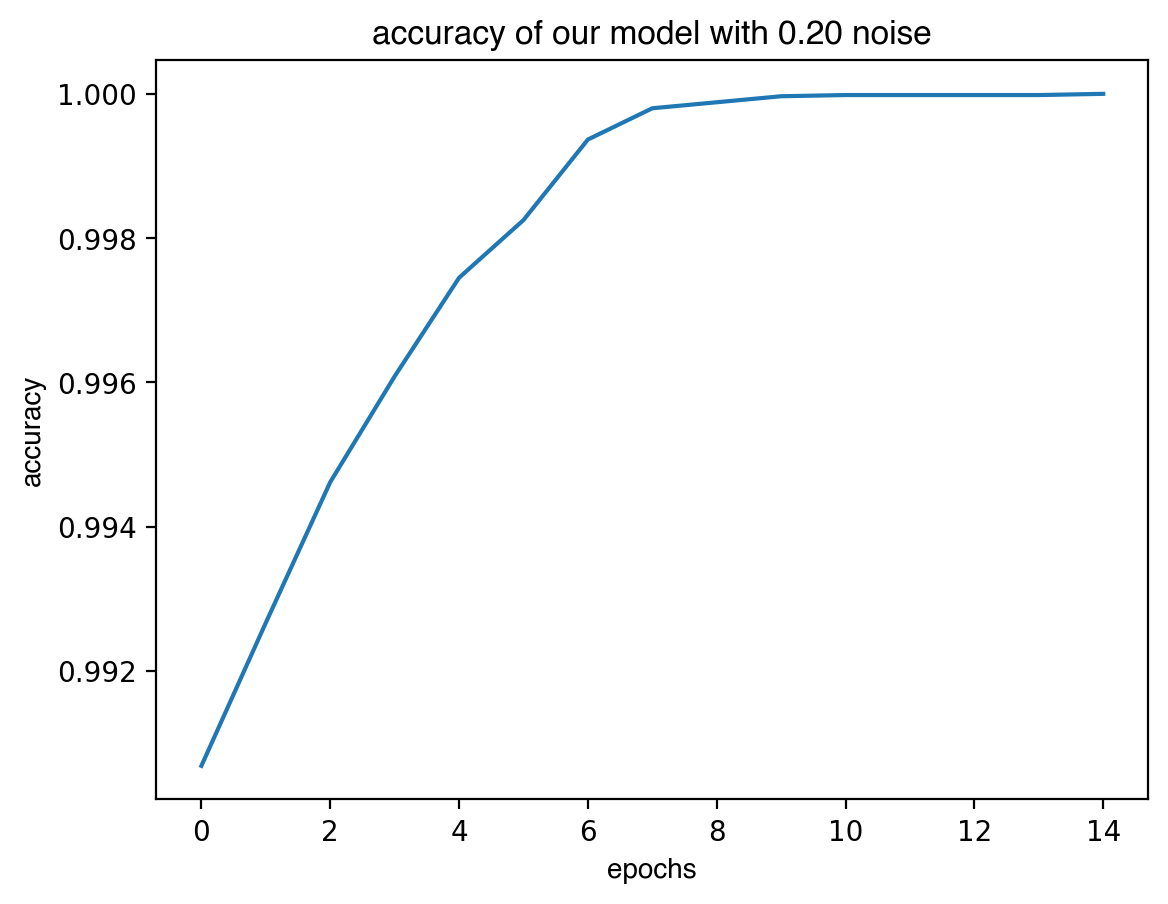

In [14]:
#loss function
testn_loss, testn_acc = mnist.evaluate(noisy_img(test_img, ynoise),test_lbl)
print('The model(noisy) has achieved an accuracy of ', testn_acc)
hfont = {'fontname':'Helvetica'}
#plot
fig,ax=plt.subplots()
ax.plot(history2.history['accuracy'])
ax.set_xlabel('epochs', **hfont)
ax.set_ylabel('accuracy', **hfont)
ax.set_title('accuracy of our model with {:.2f} noise'.format(ynoise), **hfont)

In [15]:
y_n = np.linspace(0,1,25)   #noise
result2=[] #storage
for i, val in enumerate(tqdm(y_n)):
    test2_loss, test2_acc = mnist.evaluate(noisy_img(test_img,val),test_lbl, verbose=0)
    result2.append(test2_acc)

100%|███████████████████████████████████████████| 25/25 [00:47<00:00,  1.90s/it]


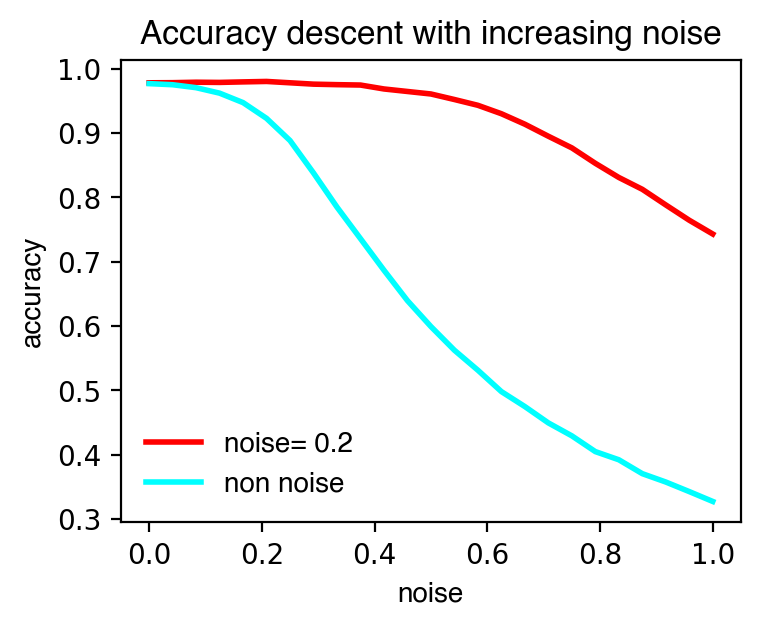

In [16]:
#plot
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(y_n,result2,color='red',linewidth=2,label='noise= 0.2')
ax.plot(y_n,result,color='cyan',linewidth=2,label='non noise')
ax.set_xlabel('noise', **hfont)
ax.set_ylabel('accuracy', **hfont)
ax.set_title('Accuracy descent with increasing noise', **hfont)
legend = ax.legend()

#font of legend
for text in legend.texts:
    text.set_fontname("Helvetica")

plt.show()


## Comments
- We can see that training the network with noisy images changes significantly the accuracy of our model over different noise livels in a very positive way.
- For a non noisy model trianing the accuracy drops aorund 0.15 of noise added however for a model that has been trained with noisy images in this case (noise=0.2) we cna see how it perfroms overall better for differnet noise levels. In this case accuracy drops around 0.7 approximately given a much robust model for the MNIST datset.
- Creating a better model for small variations in the images.

5. What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?

In [19]:
#sequential is a standard layered neural network
model2 = keras.Sequential([
    
    #add a Dense layer  of 128 nodes with 28x28 input nodes and 'reLU' activation
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    
    #10 node in the output layer for each possible number
    keras.layers.Dense(10) ])

#compile the network with cross entropy loss and stochastic gradient descent optimiser with learning rate of 1.0
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

In [20]:
#array of noise values for retraining 
y_training_noise = np.linspace(0, 1, 11)

#array of noise values for testing network accuracy 
y_testing_noise = np.linspace(0, 1, 25)

#storage for accuracy over noise range
noise_result = np.zeros([len(y_training_noise), len(y_testing_noise)])

for i in tqdm(range(len(y_training_noise))):
    #retrain model with current noise value
    history3 = model2.fit(noisy_img(train_img, y_training_noise[i]), train_lbl, 
                         batch_size=100, epochs=30, verbose=0 )
   
    for j in range(len(y_testing_noise)) :
        #accuracy of retrained network over range of noisy images
        test_loss, test_acc = model2.evaluate(noisy_img(test_img, y_testing_noise[j]), test_lbl, verbose=0)
        
        #results
        noise_result[i,j] = test_acc

100%|██████████████████████████████████████████| 11/11 [19:33<00:00, 106.69s/it]


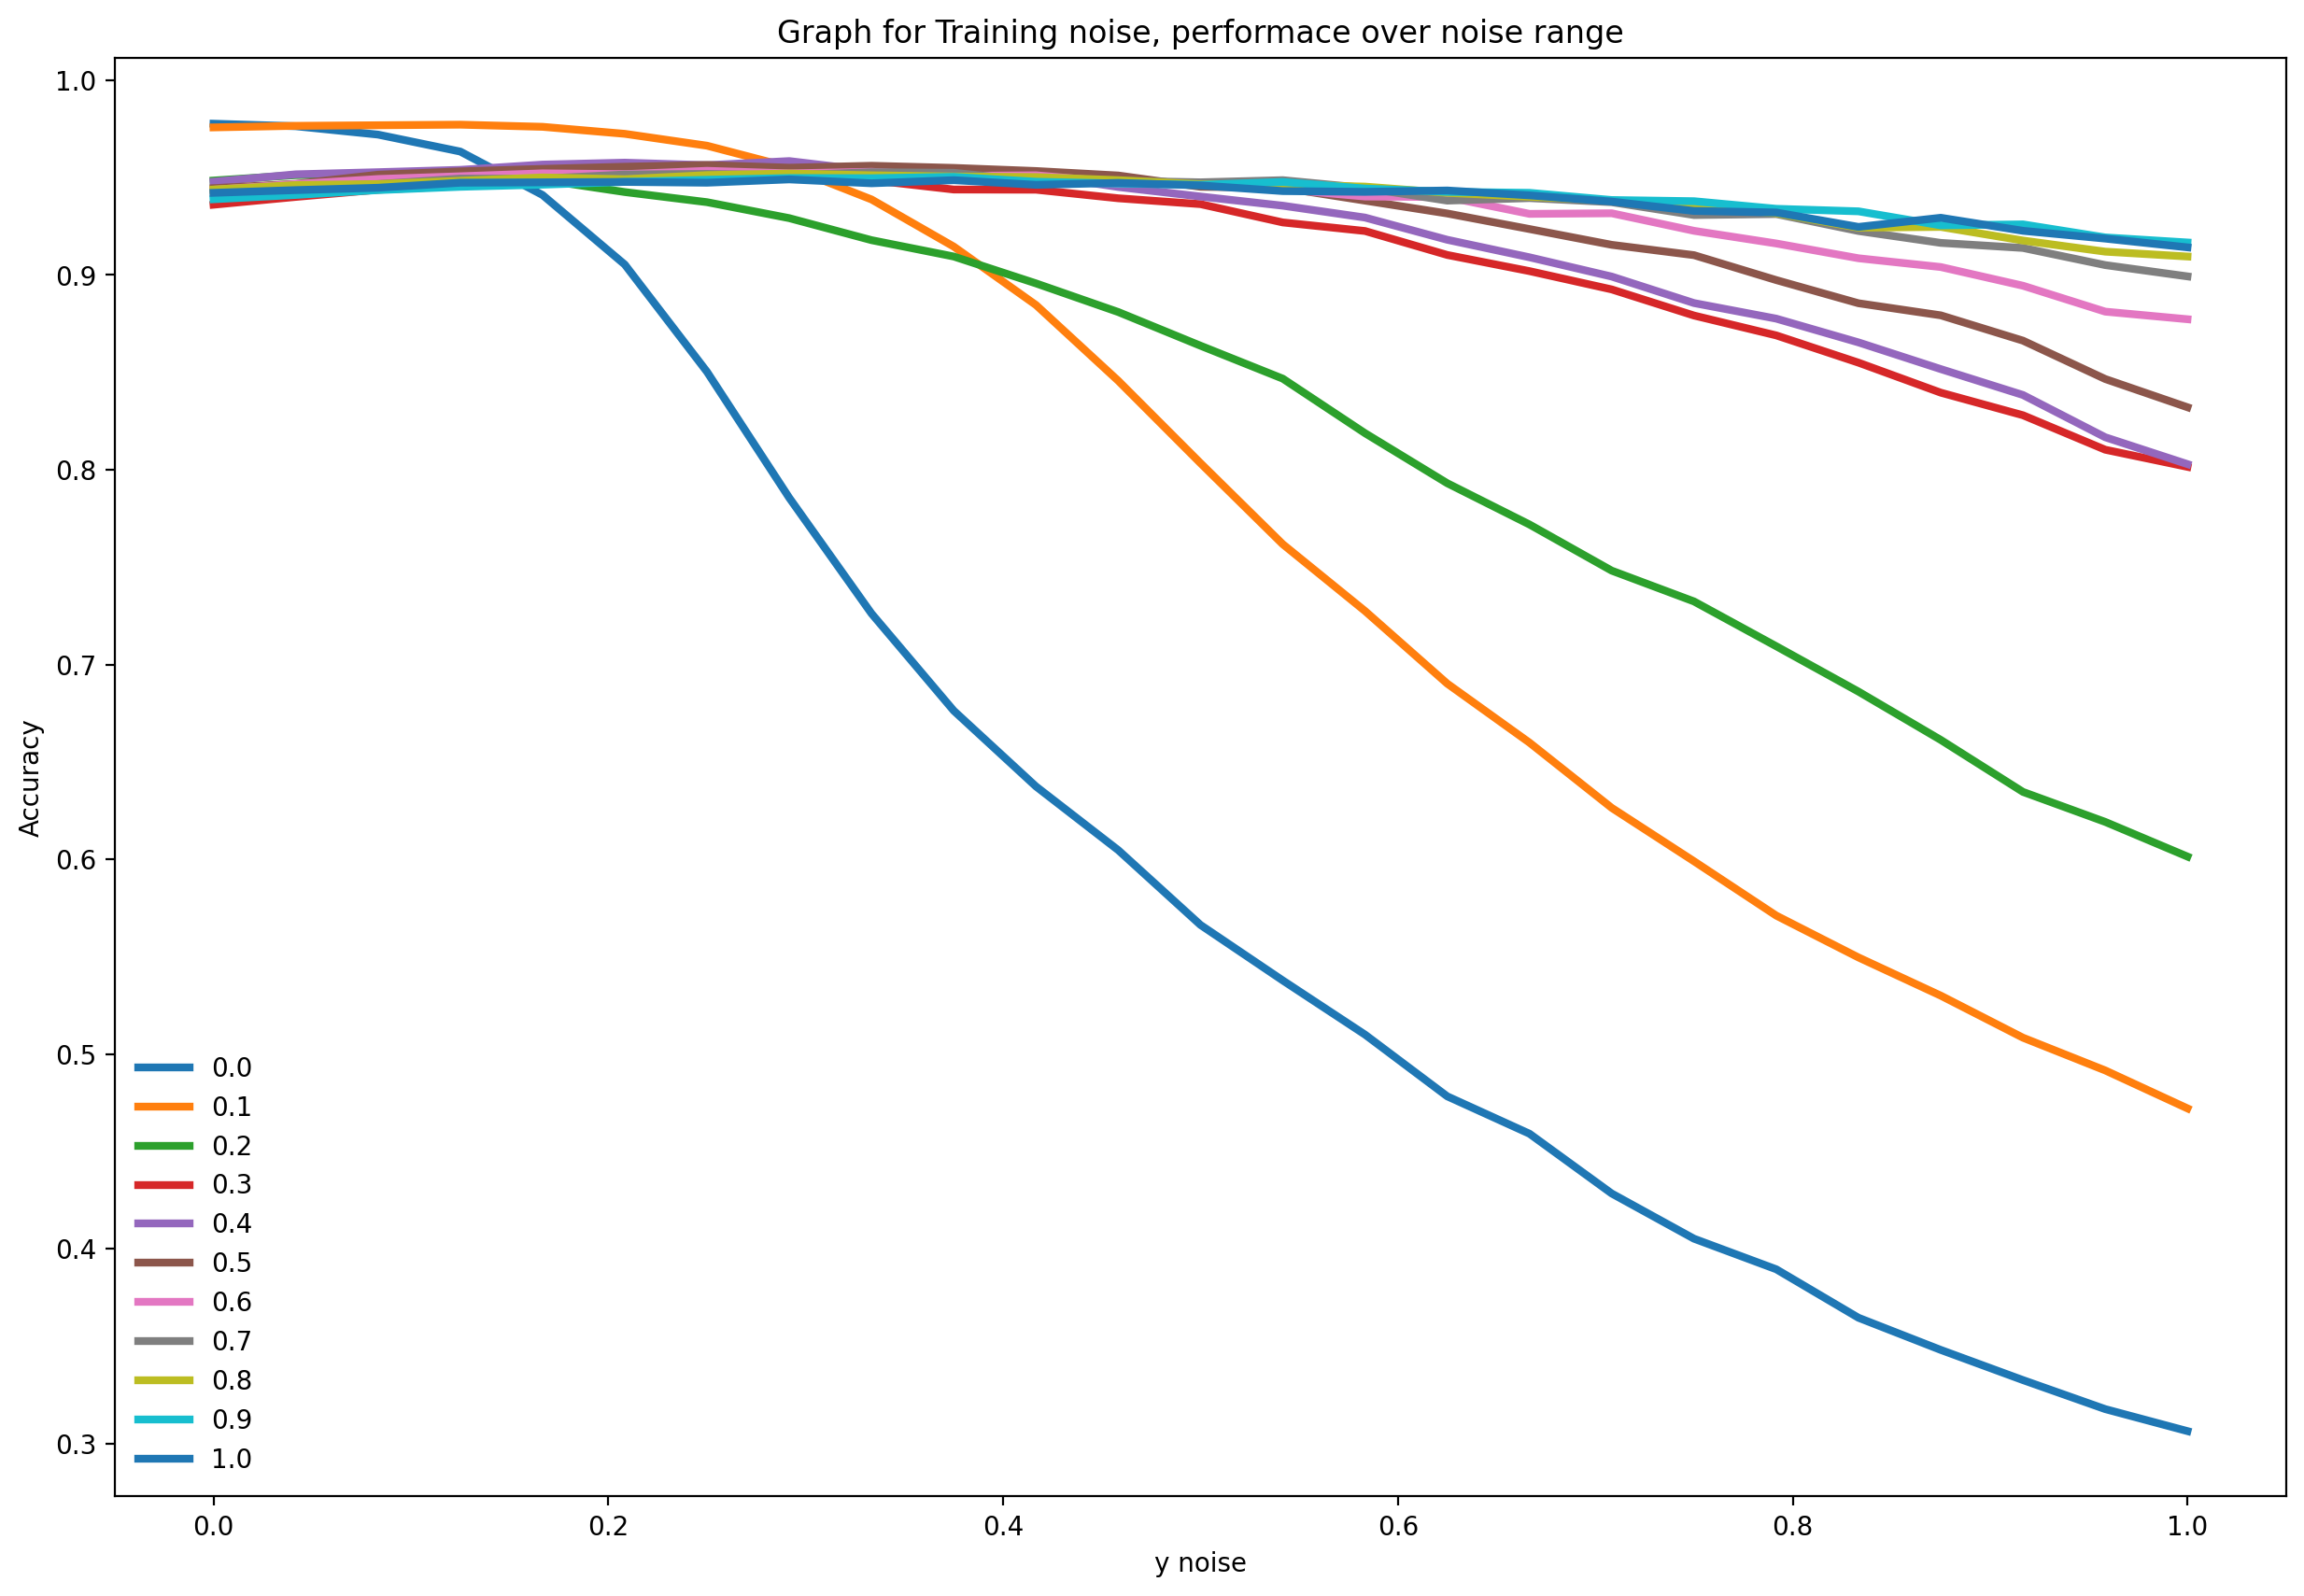

In [21]:
#plot
fig, ax = plt.subplots(figsize=(15,10))

#loop plotting each result
for i in range(len(y_training_noise)):
    ax.plot(y_testing_noise, noise_result[i], linewidth=3, label= '{0:.1f}'.format(y_training_noise[i]))  

#setting labels, legend and title
ax.set_xlabel('y noise',**hfont)
ax.set_ylabel('Accuracy' **hfont)
ax.set_title('Graph for Training noise, performace over noise range' **hfont)
ax.legend()

plt.show()

## Comments
- We can see here how each noise added variates the accuracy of the model, teh best noise seems to be in the range of (0.3-0.5). Also above a certain value of noise there is a slight drop in accuracy of the model, around 0.6. But it performs the best.
- It can also be noticed that for 0.1 and less added noise the accuracy drop really quickly and 0.2 a bit slower but still there is a gap in accuracy in between 0.2 and 0.3.
- The best values for added noise to make a better and more robust system that can hold for small variations in images are on the range of 0.6-1.0 added noise and a still prety good result for 0.4-0.5.
- Each retraining also has a side effect, retraining a new netwoork on noise of 0.4 or above ahchieves a bad result and higher noise training requires more time.
